# 14.1. Manipulating and visualizing graphs with NetworkX

In [15]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import plotly.offline as py 
import plotly.graph_objs as go 
%matplotlib inline

In [16]:
trace = go.Scatter( 
    x=[1, 2, 2, 1], 
    y=[3, 4, 3, 4], 
    mode='markers',
    marker=dict(size=[100, 100, 100, 100])
)

# Edges
x0 = [1, 2]
y0 = [3, 3]
x1 = [2, 1]
y1 = [4, 4]

fig = go.Figure(
    data=[trace],
    layout=go.Layout(
        annotations = [
            dict(ax=x0[i], ay=y0[i], axref='x', ayref='y',
                x=x1[i], y=y1[i], xref='x', yref='y',
                showarrow=True, arrowhead=1,) for i in range(0, len(x0))
        ]
    )
) 
py.plot(fig)

'temp-plot.html'

In [20]:
n = 10  # Number of nodes in the graph.
# Each node is connected to the two next nodes,
# in a circular fashion.
adj = [(i, (i + 1) % n) for i in range(n)]
adj += [(i, (i + 2) % n) for i in range(n)]

In [21]:
g = nx.Graph(adj)

In [4]:
print(g.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [5]:
print(g.edges())

[(0, 1), (0, 9), (0, 2), (0, 8), (1, 2), (1, 3), (1, 9), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7), (6, 8), (7, 8), (7, 9), (8, 9)]


In [7]:
print(nx.adjacency_matrix(g))

  (0, 1)	1
  (0, 2)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 9)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1
  (3, 4)	1
  (3, 5)	1
  (4, 2)	1
  (4, 3)	1
  (4, 5)	1
  (4, 6)	1
  (5, 3)	1
  (5, 4)	1
  (5, 6)	1
  (5, 7)	1
  (6, 4)	1
  (6, 5)	1
  (6, 7)	1
  (6, 8)	1
  (7, 5)	1
  (7, 6)	1
  (7, 8)	1
  (7, 9)	1
  (8, 0)	1
  (8, 6)	1
  (8, 7)	1
  (8, 9)	1
  (9, 0)	1
  (9, 1)	1
  (9, 7)	1
  (9, 8)	1


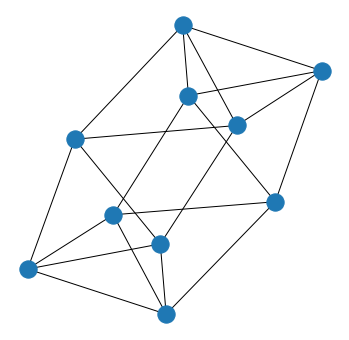

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw(g, ax=ax)

In [10]:
g.add_node(n, color='#fcff00')
# We add an edge from every existing
# node to the new node.
for i in range(n):
    g.add_edge(i, n)

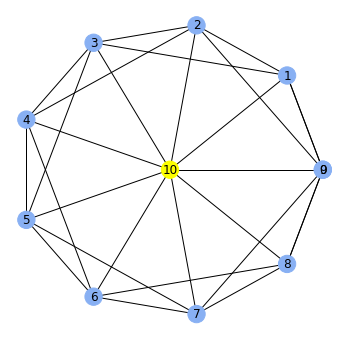

In [11]:
# We define custom node positions on a circle
# except the last node which is at the center.
t = np.linspace(0., 2 * np.pi, n)
pos = np.zeros((n + 1, 2))
pos[:n, 0] = np.cos(t)
pos[:n, 1] = np.sin(t)

# A node's color is specified by its 'color'
# attribute, or a default color if this attribute
# doesn't exist.
color = [g.node[i].get('color', '#88b0f3')
         for i in range(n + 1)]

# We now draw the graph with matplotlib.
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(g, pos=pos, node_color=color, ax=ax)
ax.set_axis_off()

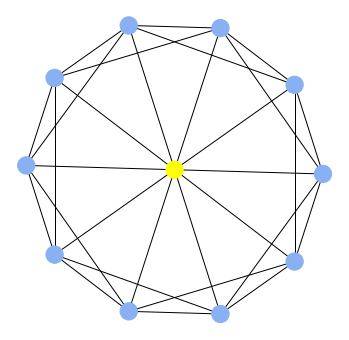

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_spectral(g, node_color=color, ax=ax)
ax.set_axis_off()